# Predicting life Expectancy of a new born

## Data Exploration

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error, r2_score

### Importing Dataset

In [2]:
dataset = pd.read_csv('train.csv')
dataset = dataset.drop(['ID'], axis = 1)

dataset_X = dataset.drop('TARGET_LifeExpectancy', axis=1)
dataset_y = dataset[['TARGET_LifeExpectancy']]

X_train = dataset.drop('TARGET_LifeExpectancy', axis=1)
y_train = dataset[['TARGET_LifeExpectancy']]

X_test = pd.read_csv('test.csv')
X_test = X_test.drop(['ID'], axis = 1) 

### Robust Scalar

In [3]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_train_robust = scaler.fit_transform(X_train)
X_train_robust = pd.DataFrame(X_train_robust)

y_train_robust = scaler.fit_transform(y_train)
y_train_robust = pd.DataFrame(y_train_robust)

### Splitting training and testing data

In [4]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_robust, y_train_robust, test_size = 0.2, random_state = 0)

In [5]:
dataset.head(5)

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,67.1,146,2017,0,263,262,264,62,0.01,71.279624,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,59.8,146,2016,0,271,278,264,64,0.01,73.523582,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,57.6,146,2015,0,268,246,290,66,0.01,73.219243,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,55.5,146,2014,0,272,248,296,69,0.01,78.184215,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,57.7,146,2013,0,275,278,272,71,0.01,7.097109,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


### Statistical Summary

In [6]:
dataset.describe()

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,764.540216,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,2081.880374,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,5.848550,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,69.020425,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,430.190047,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,19479.911610,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


### Histogram for distribution of data

<Figure size 432x288 with 0 Axes>

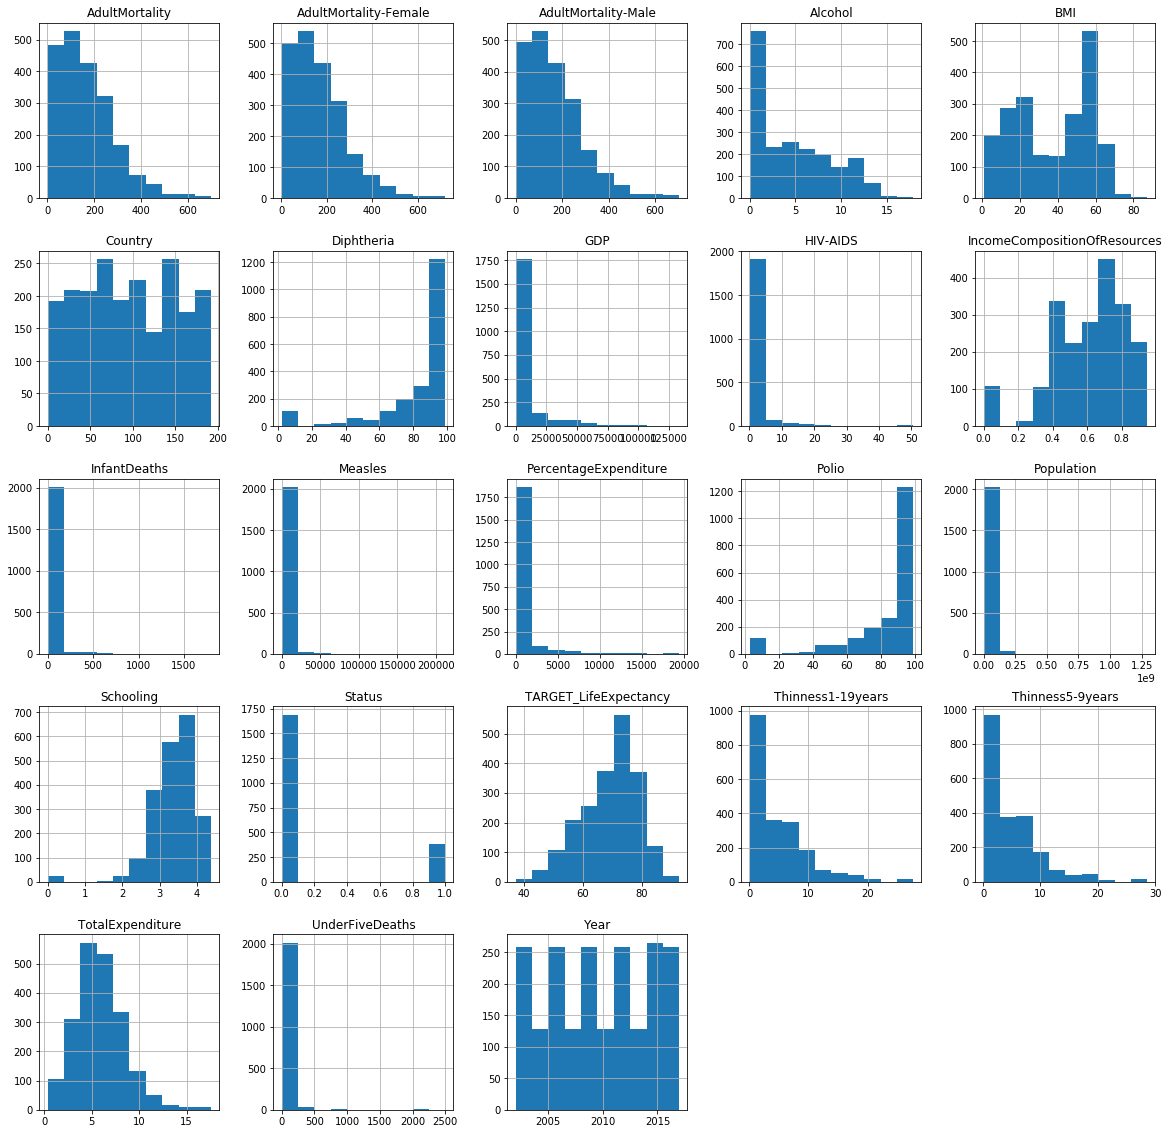

In [7]:
plt.figure()
dataset.hist(figsize=(20,20))
plt.show()

### Box plots

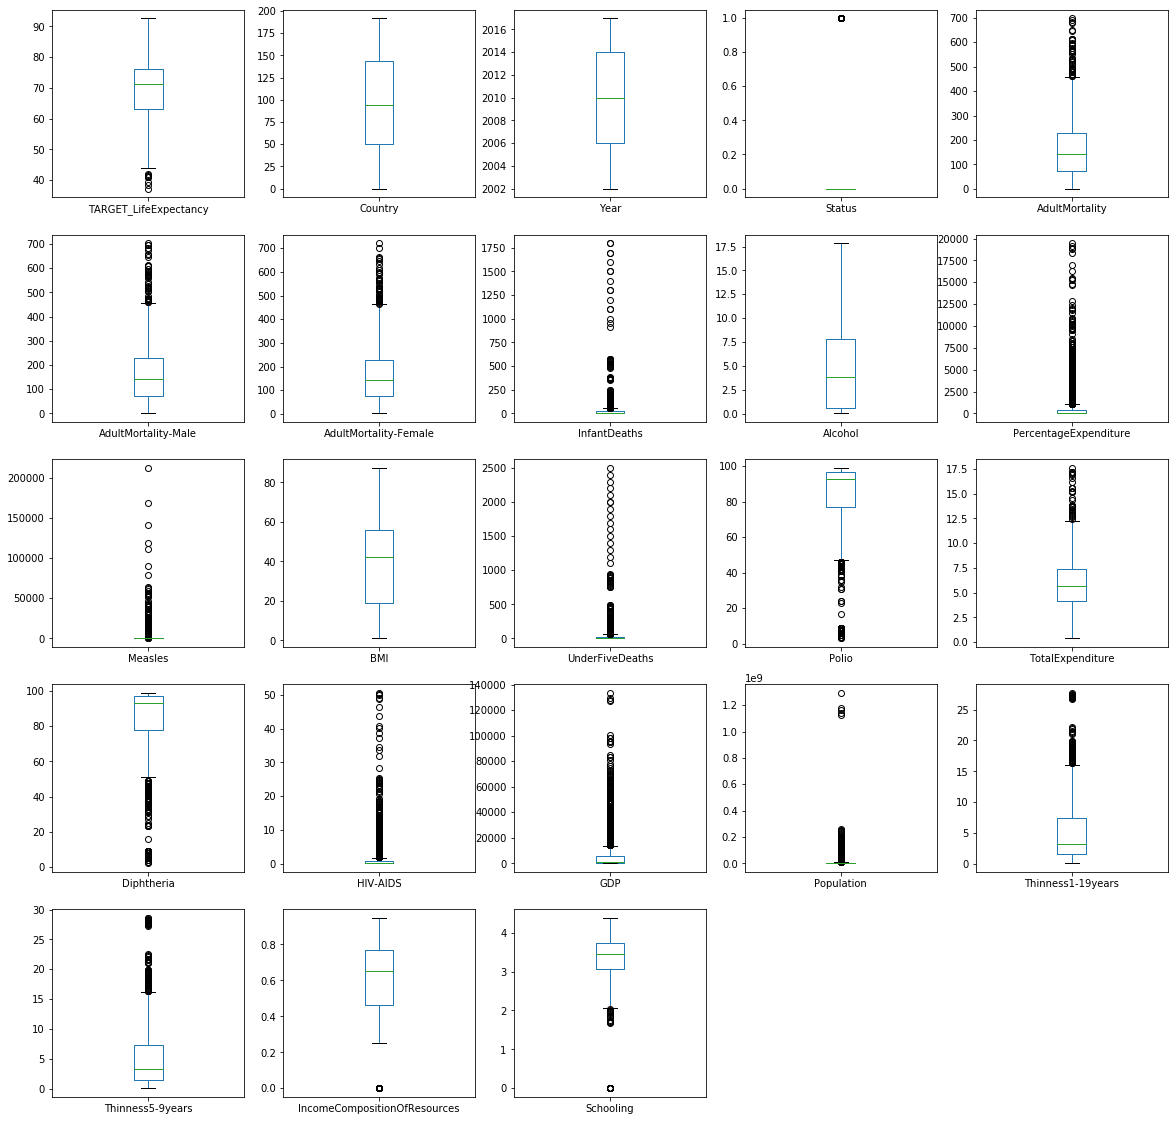

In [8]:
dataset.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,20))
plt.show()

### Heatmap

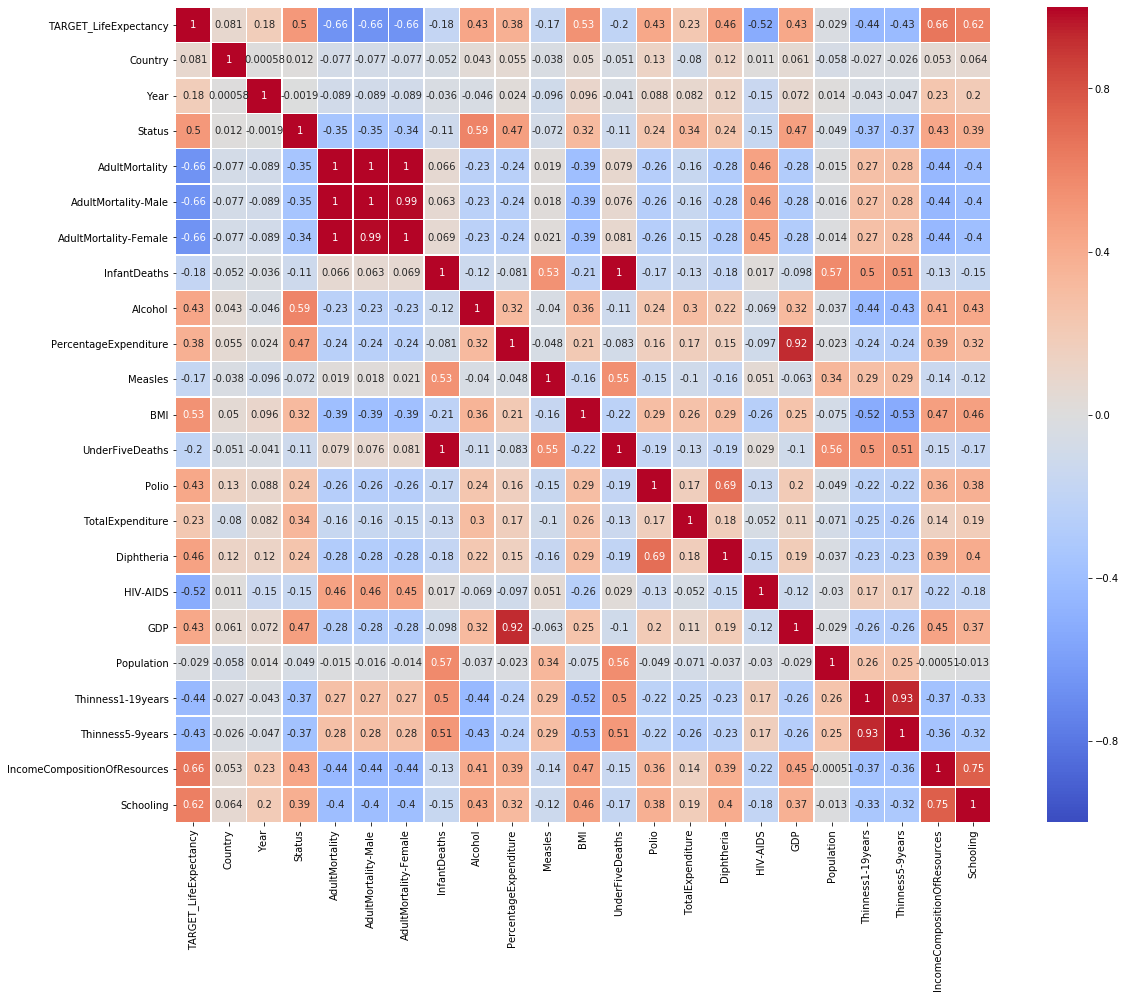

In [9]:
import seaborn as sns
correlations = dataset.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, cmap="coolwarm", annot=True, linewidth=0.5, center=0, vmin=-1, vmax=1, square=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
# discover the values for bottom and top 
b, t = plt.ylim()
# Add 0.5 to the bottom
b += 0.5
# Subtract 0.5 from the top
t -= 0.5
# update the ylim(bottom, top) values
plt.ylim(b, t)

plt.show()

# Regression Models

## Multiple Linear Regression

In [10]:
import statsmodels.api as sm
X_train_robust = sm.add_constant(X_train_robust)
OLS_model = sm.OLS(y_train_robust, X_train_robust).fit()
OLS_model.summary()

/Users/jigar/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     305.8
Date:                Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:55:49   Log-Likelihood:                -815.11
No. Observations:                2071   AIC:                             1674.
Df Residuals:                    2049   BIC:                             1798.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0120      0.012     -1.015      0.310      -0.035       0.011
0              0.0220      0.014      1.584      0.113      -0.005       0.049
1              0.0358      0.015      2.443      0.015       0.007       0.065
2              0.1904      0.029      6.606      0.000       0.134       0.247
3             -0.0817      0.004    -18.194      0.000      -0.091      -0.073
4             -0.0330      0.080     -0.412      0.680      -0.190       0.124
5             -0.1289      0.080     -1.601      0.109      -0.287       0.029
6              0.1608      0.019      8.535      0.000       0.124       0.198
7              0.1042      0.019      5.540      0.000       0.067       0.141
8             -0.0002      0.004     -0.039      0.969      -0.009       0.008
9             -0.0003      0.000     -0.612      0.540      -0.001       0.001
10             0.0894      0.020      4.559      0.000       0.051       0.128
11            -0.1467      0.017     -8.636      0.000      -0.180      -0.113
12             0.0306      0.010      3.174      0.002       0.012       0.050
13            -0.0008      0.011     -0.074      0.941      -0.023       0.022
14             0.0460      0.009      4.915      0.000       0.028       0.064
15            -0.0271      0.001    -20.244      0.000      -0.030      -0.024
16             0.0180      0.008      2.318      0.021       0.003       0.033
17            -0.0006      0.001     -0.733      0.464      -0.002       0.001
18            -0.0340      0.027     -1.249      0.212      -0.087       0.019
19            -0.0159      0.028     -0.575      0.565      -0.070       0.038
20             0.1485      0.019      7.773      0.000       0.111       0.186
21             0.1178      0.015      8.086      0.000       0.089       0.146
==============================================================================
Omnibus:                       90.029   Durbin-Watson:                   0.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.047
Skew:                          -0.229   Prob(JB):                     2.72e-48
Kurtosis:                       4.526   Cond. No.                     4.47e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.53e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
pValue = OLS_model.pvalues
significant_values = list(pValue[pValue<= 0.05].index)
print('P values: ', pValue)
print('\n')
print('Significant values: ', significant_values)

P values:  const    3.103424e-01
0        1.133738e-01
1        1.464718e-02
2        5.007808e-11
3        1.102829e-68
4        6.803338e-01
5        1.094556e-01
6        2.676580e-17
7        3.412483e-08
8        9.691674e-01
9        5.404633e-01
10       5.444515e-06
11       1.154328e-17
12       1.527239e-03
13       9.409571e-01
14       9.602884e-07
15       3.248319e-83
16       2.054696e-02
17       4.637445e-01
18       2.116811e-01
19       5.654659e-01
20       1.202570e-14
21       1.041564e-15
dtype: float64


Significant values:  [1, 2, 3, 6, 7, 10, 11, 12, 14, 15, 16, 20, 21]


In [12]:
from sklearn import linear_model
linReg = linear_model.LinearRegression()
linReg.fit(X_train1, y_train1)

y_pred_linear = linReg.predict(X_test1)
r2_test_linear = r2_score(y_test1, y_pred_linear)
rmse_test_linear = np.sqrt(mean_squared_error(y_test1, y_pred_linear))
print ("RMSE of Linear regression test: ", rmse_test_linear)
print ("R2 of Linear regression test: ", r2_test_linear)

RMSE of Linear regression test:  0.34932020459045215
R2 of Linear regression test:  0.757425943357354


## Polynomial regression

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Fitting Polynomial with degree=1
poly_features1 = PolynomialFeatures(degree=1)
X_train_poly1 = poly_features1.fit_transform(X_train1)
poly_model1 = LinearRegression()
poly_model1.fit(X_train_poly1, y_train1)

# Fitting Polynomial with degree=2
poly_features2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly_features2.fit_transform(X_train1)
poly_model2 = LinearRegression()
poly_model2.fit(X_train_poly2, y_train1)

# Fitting Polynomial with degree=3
poly_features3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly_features3.fit_transform(X_train1)
poly_model3 = LinearRegression()
poly_model3.fit(X_train_poly3, y_train1)

# Predictions and evaluations for polynomial model of degree=1
y_train_pred1 = poly_model1.predict(X_train_poly1)
y_test_pred1 = poly_model1.predict(poly_features1.fit_transform(X_test1))
rmse_train1 = np.sqrt(mean_squared_error(y_train1, y_train_pred1))
r2_train1 = r2_score(y_train1, y_train_pred1)
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_test_pred1))
r2_test1 = r2_score(y_test1, y_test_pred1)

# Predictions and evaluations for polynomial model of degree=2
y_train_pred2 = poly_model2.predict(X_train_poly2)
y_test_pred2 = poly_model2.predict(poly_features2.fit_transform(X_test1))
rmse_train2 = np.sqrt(mean_squared_error(y_train1, y_train_pred2))
r2_train2 = r2_score(y_train1, y_train_pred2)
rmse_test2 = np.sqrt(mean_squared_error(y_test1, y_test_pred2))
r2_test2 = r2_score(y_test1, y_test_pred2)

# Predictions and evaluations for polynomial model of degree=3
y_train_pred3 = poly_model3.predict(X_train_poly3)
y_test_pred3 = poly_model3.predict(poly_features3.fit_transform(X_test1))
rmse_train3 = np.sqrt(mean_squared_error(y_train1, y_train_pred3))
r2_train3 = r2_score(y_train1, y_train_pred3)
rmse_test3 = np.sqrt(mean_squared_error(y_test1, y_test_pred3))
r2_test3 = r2_score(y_test1, y_test_pred3)

RMSE-test-set-degree-1: 0.3493202045904522
R2-test-set-degree-1: 0.7574259433573539
RMSE-training-set-degree-1: 0.36168510149766153
R2-training-set-degree-1:: 0.7570143205992668


RMSE-test-set-degree-2: 0.33648028388059986
R2-test-set-degree-2: 0.7749307400625094
RMSE-training-set-degree-2: 0.23187218239659071
R2-training-set-degree-2:: 0.9001342107442288


RMSE-test-set-degree-3: 319.0364524614781
R2-test-set-degree-3: -202337.04729318537
RMSE-training-set-degree-3: 1.5628752076202994e-09
R2-training-set-degree-3:: 1.0


Text(0, 0.5, 'Predicted values')

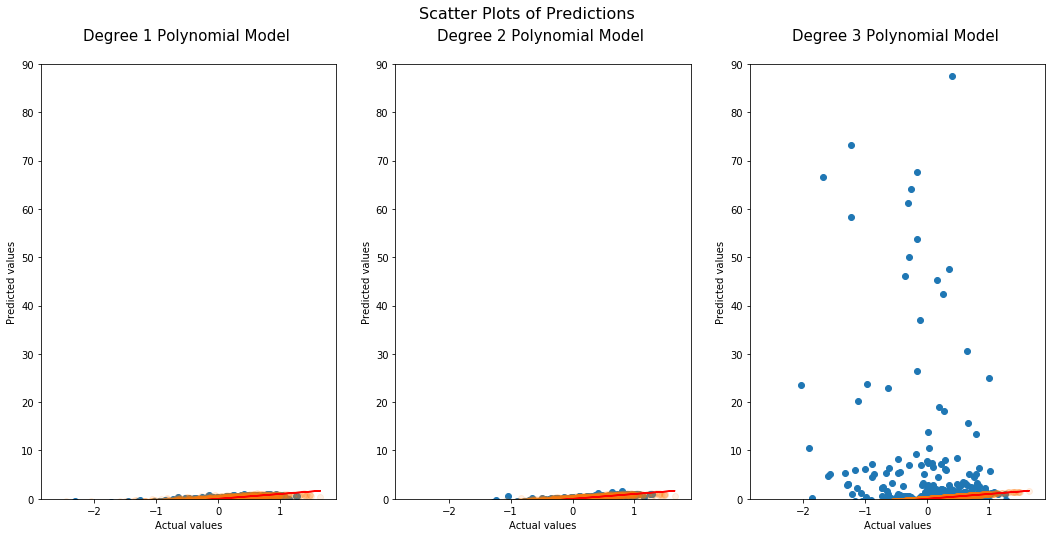

In [14]:
print("RMSE-test-set-degree-1: {}".format(rmse_test1))
print("R2-test-set-degree-1: {}".format(r2_test1))

print("RMSE-training-set-degree-1: {}".format(rmse_train1))
print("R2-training-set-degree-1:: {}".format(r2_train1))

print("\n")

print("RMSE-test-set-degree-2: {}".format(rmse_test2))
print("R2-test-set-degree-2: {}".format(r2_test2))

print("RMSE-training-set-degree-2: {}".format(rmse_train2))
print("R2-training-set-degree-2:: {}".format(r2_train2))

print("\n")

print("RMSE-test-set-degree-3: {}".format(rmse_test3))
print("R2-test-set-degree-3: {}".format(r2_test3))

print("RMSE-training-set-degree-3: {}".format(rmse_train3))
print("R2-training-set-degree-3:: {}".format(r2_train3))


plt.figure(figsize=(18,8))
plt.suptitle('Scatter Plots of Predictions', size = 16)

plt.subplot(1,3,1)
plt.title('Degree 1 Polynomial Model \n', size = 15)
plt.scatter(y_test1, y_test_pred1)
plt.scatter(y_train1, y_train_pred1,alpha=0.10)
plt.plot(y_train1, y_train1, color="red")
plt.ylim(0,90)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.subplot(1,3,2)
plt.title('Degree 2 Polynomial Model \n', size = 15)
plt.scatter(y_test1, y_test_pred2)
plt.scatter(y_train1, y_train_pred2,alpha=0.10)
plt.plot(y_train1, y_train1, color="red")
plt.ylim(0,90)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.subplot(1,3,3)
plt.title('Degree 3 Polynomial Model \n', size = 15)
plt.scatter(y_test1, y_test_pred3)
plt.scatter(y_train1, y_train_pred3,alpha=0.10)
plt.plot(y_train1, y_train1, color="red")
plt.ylim(0,90)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

## Ridge regression

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

linReg = LinearRegression()
linReg.fit(X_train1, y_train1)
lin_train =linReg.score(X_train1, y_train1)
lin_test =linReg.score(X_test1, y_test1)

# Fitting Ridge with alpha=0.01
ridge1 = Ridge(alpha=0.01)
ridge1.fit(X_train1, y_train1)
Ridge1_train = ridge1.score(X_train1,y_train1)
Ridge1_test = ridge1.score(X_test1, y_test1)

# Fitting Ridge with alpha=100
ridge2 = Ridge(alpha=100)
ridge2.fit(X_train1, y_train1)
Ridge2_train = ridge2.score(X_train1,y_train1)
Ridge2_test = ridge2.score(X_test1, y_test1)


# Predictions and evaluations for Ridge1 test data-set
y_test_ridge_pred1 = ridge1.predict(X_test1)
rmse_test_ridge1 = np.sqrt(mean_squared_error(y_test1, y_test_ridge_pred1))
r2_test_ridge1 = r2_score(y_test1, y_test_ridge_pred1)

# Predictions and evaluations for Ridge1 test data-set
y_test_ridge_pred2 = ridge1.predict(X_test1)
rmse_test_ridge2 = np.sqrt(mean_squared_error(y_test1, y_test_ridge_pred2))
r2_test_ridge2 = r2_score(y_test1, y_test_ridge_pred2)


print ("RMSE of Ridge 1 test: ", rmse_test_ridge1)
print ("R2 of Ridge 1 test: ", r2_test_ridge1)
print ("\n")
print ("RMSE of Ridge 2 test: ", rmse_test_ridge2)
print ("R2 of Ridge 2 test: ", r2_test_ridge2)

RMSE of Ridge 1 test:  0.3493190173913858
R2 of Ridge 1 test:  0.757427592178123


RMSE of Ridge 2 test:  0.3493190173913858
R2 of Ridge 2 test:  0.757427592178123


Linear regression train score:  0.7570143205992668
Linear regression test score:  0.757425943357354


Ridge1 train score:  0.7570143204613429
Ridge1 test score:  0.757427592178123


Ridge2 train score:  0.7544977071524723
Ridge2 test score:  0.7576615532780802


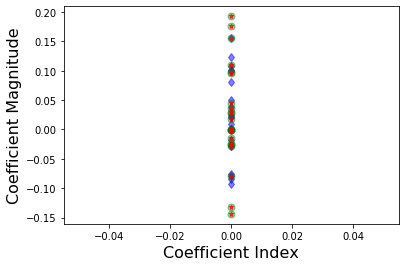

In [16]:
print ("Linear regression train score: ", lin_train)
print ("Linear regression test score: ", lin_test)
print ("\n")
print ("Ridge1 train score: ", Ridge1_train)
print ("Ridge1 test score: ", Ridge1_test)
print ("\n")
print ("Ridge2 train score: ", Ridge2_train)
print ("Ridge2 test score: ", Ridge2_test)

plt.plot(ridge1.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(ridge2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(linReg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.show()

## Lasso regression

In [17]:
from sklearn.linear_model import Lasso

# Fitting lasso with default values
lasso = Lasso()
lasso.fit(X_train1,y_train1)
train_score=lasso.score(X_train1,y_train1)
test_score=lasso.score(X_test1,y_test1)
coeff_used = np.sum(lasso.coef_!=0)

# Fitting Lasso with alpha=0.01
lasso1 = Lasso(alpha=0.01, max_iter=10e5)
lasso1.fit(X_train1,y_train1)
lasso1_train=lasso1.score(X_train1,y_train1)
lasso1_test=lasso1.score(X_test1,y_test1)
lasso1_coeff = np.sum(lasso1.coef_!=0)

# Fitting Lasso with alpha=0.0001
lasso2 = Lasso(alpha=0.0001, max_iter=10e5)
lasso2.fit(X_train1,y_train1)
lasso2_train=lasso2.score(X_train1,y_train1)
lasso2_test=lasso2.score(X_test1,y_test1)
lasso2_coeff = np.sum(lasso2.coef_!=0)


# Predictions and evaluations for Ridge test data-set
y_test_lasso_pred = lasso.predict(X_test1)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test1, y_test_lasso_pred))
r2_test_lasso = r2_score(y_test1, y_test_lasso_pred)

# Predictions and evaluations for Ridge1 test data-set
y_test_lasso_pred1 = lasso1.predict(X_test1)
rmse_test_lasso1 = np.sqrt(mean_squared_error(y_test1, y_test_lasso_pred1))
r2_test_lasso1 = r2_score(y_test1, y_test_lasso_pred1)

# Predictions and evaluations for Ridge1 test data-set
y_test_lasso_pred2 = lasso1.predict(X_test1)
rmse_test_lasso2 = np.sqrt(mean_squared_error(y_test1, y_test_lasso_pred2))
r2_test_lasso2 = r2_score(y_test1, y_test_lasso_pred2)

print ("RMSE of Lasso test: ", rmse_test_lasso)
print ("R2 of Lasso test: ", r2_test_lasso)
print ("\n")
print ("RMSE of Lasso 1 test: ", rmse_test_lasso1)
print ("R2 of Lasso 1 test: ", r2_test_lasso1)
print ("\n")
print ("RMSE of Lasso 2 test: ", rmse_test_lasso2)
print ("R2 of Lasso 2 test: ", r2_test_lasso2)

RMSE of Lasso test:  0.5805764132191235
R2 of Lasso test:  0.32993687968483787


RMSE of Lasso 1 test:  0.35434387245802274
R2 of Lasso 1 test:  0.7503987283972721


RMSE of Lasso 2 test:  0.35434387245802274
R2 of Lasso 2 test:  0.7503987283972721


training score: 0.28210683997251584
test score:  0.32993687968483787
number of features used:  3


training score for alpha=0.01: 0.750719613308996
test score for alpha =0.01:  0.7503987283972721
number of features used: for alpha =0.01: 17


training score for alpha=0.0001: 0.7570135823853046
test score for alpha =0.0001:  0.7574291427337038
number of features used: for alpha =0.0001: 21




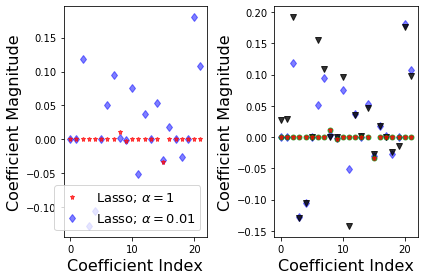

In [18]:
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
print ("\n")

print ("training score for alpha=0.01:", lasso1_train)
print ("test score for alpha =0.01: ", lasso1_test)
print ("number of features used: for alpha =0.01:", lasso1_coeff)
print ("\n")


print ("training score for alpha=0.0001:", lasso2_train)
print ("test score for alpha =0.0001: ", lasso2_test)
print ("number of features used: for alpha =0.0001:", lasso2_coeff)
print ("\n")

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7)
plt.plot(lasso1.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7)
plt.plot(lasso1.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')
plt.plot(lasso2.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$')
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)

plt.tight_layout()
plt.show()